<a id='section_id0'></a>
# Data Programming Essentials *with Python*

## Part-5: Modeling 4 : Bayes' classifier

<font color="#740202">**Table of contents:**

|No.|Topic||No.|Topic||No.|Topic|
|:------|:------||:------|:------||:------|:------|
|1.|[Key Libraries](#section_id1)||2.|[Data preparation](#section_id2)||3.|[Manual Naive Bayes with "sex" and "race"](#section_id3)  |
|4.|[Naive Bayes with Scikit](#section_id4)  ||5.|[Using all variables](#section_id5)  ||6.|[References](#section_id6)  |

***

<a id='section_id1'></a>
### <span style="background-color:#B0E0E6">Libraries</span>

In [121]:
#pandas and numpy
import pandas as pd
import numpy as np

#Scikit stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB, ComplementNB
import scikitplot as skplt

#for plots
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

#DMBA book utility tools
from dmba import classificationSummary, gainsChart, liftChart

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id2'></a>
### <span style="background-color:#B0E0E6">Data preparation </span>

|Variable|Description|
|:------|:------|
|sleeping|sleep hours on an average shcool night: 1=<4 hrs, 2=5 hrs, 3=6 hrs, 4=7 hrs, 5=8 hrs, 6=9 hrs, 7= >=10 hrs|
|sex|1=Female, 2=Male|
|race|1=White, 2=Black or African American, 3=Hispanic/Latino, 4=All other races|
|sexharass|sexual harassment during the past 12 months: 1=0 times, 2=1 time, 3=2 or 3 times, 4=4 or 5 times, 5=6 or more times|
|smoking|smoke cigarettes during the past 30 days: 1=0 days, 2=1 or 2 days, 3=3 to 5 days, 4= 6 to 9 days, 5=10 to 19 days, 6=20 to 29 days, 7=all 30 days|
|vegetables|eating other vegetables(do not count green salad, potatoes, or carrots) during the past 7 days: 1=0 times, 2=1 to 3 times, 3=4 to 6 times, 4=1 time/day, 5=2 times/day, 6=3 times/day, 7=>= 4 times/day|
|soda|drinking soda or pop during past 7 days: 1= 0 times, 2=1 to 3 times, 3=4 to 6 times, 4=1 time/day, 5=2 times/day, 6=3 times/day, 7=>=4 times/day |
|breakfast|days of eating breakfast per week: 1=0 day, 2=1 day, 3=2 days, 4=3 days, 5= 4 days, 6=5 days, 7=6 days, 8= 7 days|
|computer|hours of playing computer games or something that is not school work per day: 1=0 hrs, 2=<1 hr, 3=1 hr, 4=2 hrs, 5=3 hrs, 6=4 hrs, 7=>=5 hrs|


In [144]:
df1 = pd.read_csv('sleeping.csv')

In [145]:
df1.head(3)

,sleeping,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer
0,1,2,4,4,4,3,2,3,3
1,1,2,3,1,1,2,1,1,2
2,1,2,4,1,1,1,1,1,1


In [146]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36220 entries, 0 to 36219
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sleeping    36220 non-null  int64
 1   sex         36220 non-null  int64
 2   race        36220 non-null  int64
 3   sexharass   36220 non-null  int64
 4   smoking     36220 non-null  int64
 5   vegetables  36220 non-null  int64
 6   soda        36220 non-null  int64
 7   breakfast   36220 non-null  int64
 8   computer    36220 non-null  int64
dtypes: int64(9)
memory usage: 2.5 MB


In [147]:
# inserting a health_category column
df1['sleepcat']=pd.cut(df1['sleeping'], bins=[0,4,8], labels=['short', 'long']) # 0 = short, 1 =long
df1.head(6)

,sleeping,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer,sleepcat
0,1,2,4,4,4,3,2,3,3,short
1,1,2,3,1,1,2,1,1,2,short
2,1,2,4,1,1,1,1,1,1,short
3,3,2,4,1,1,3,5,5,4,short
4,3,2,4,1,6,2,6,5,7,short
5,5,2,4,1,1,5,2,4,5,long


In [148]:
df1.drop(columns=['sleeping'], inplace=True) # no need to do this

In [149]:
df1.columns

Index(['sex', 'race', 'sexharass', 'smoking', 'vegetables', 'soda',
       'breakfast', 'computer', 'sleepcat'],
      dtype='object')

In [150]:
df1['racecat']=pd.cut(df1['race'], bins=[0,2,5], labels=['white', 'nonwhite']) # 1 = white, 0 =nonwhite


In [131]:
# inserting a sleep_category column

#df1['sexharcat']=pd.cut(df1['sexharass'], bins=[0,1,6], labels=['No', 'Yes']) # 0 = no, 1 =yes


In [152]:
df1.head(3)

,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer,sleepcat,racecat
0,2,4,4,4,3,2,3,3,short,nonwhite
1,2,3,1,1,2,1,1,2,short,nonwhite
2,2,4,1,1,1,1,1,1,short,nonwhite


In [153]:
df1.sleepcat = df1.sleepcat.astype('category') 
df1.racecat = df1.racecat.astype('category') 
df1.sex = df1.sex.astype('category')

Stumped by categorical data? Count plots to the help!

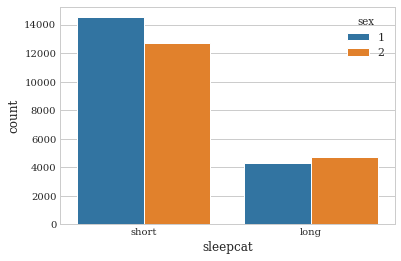

In [154]:
sns.countplot(x='sleepcat', hue='sex', data=df1)

C:\Users\edwar\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


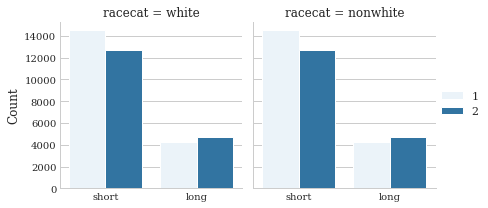

In [155]:
g = sns.FacetGrid(df1, col="racecat")
g.map(sns.countplot, x="sleepcat", hue="sex", data=df1)
g.set_axis_labels("","Count")
g.add_legend()

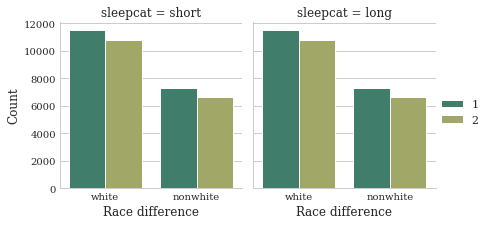

In [156]:
g2 = sns.FacetGrid(df1, col="sleepcat")
g2.map(sns.countplot, x="racecat", hue="sex", data=df1, palette="gist_earth")
g2.set_axis_labels("Race difference","Count")
g2.add_legend()

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id3'></a>
### <span style="background-color:#B0E0E6">Manual Naive Bayes steps with variables of "race" and "sex" only </span>
* Refer to class slides for the formula derivations

In [141]:
# split the original data frame into a train and test using the same random_state
train_df, valid_df = train_test_split(df1, test_size=0.10, random_state=1)

In [142]:
pd.set_option('precision', 3) # to get only 3 digit rounded numbers for probabilities

In [143]:
# probability of fraudulent and truthful reports
print(train_df['sleepcat'].value_counts() / len(train_df))

short    0.753
long     0.247
Name: sleepcat, dtype: float64


In [157]:
predictors = ['sex', 'racecat']
for predictor in predictors:
    # construct the frequency table
    df = train_df[['sleepcat', predictor]]
    freqTable = df.pivot_table(index='sleepcat', columns=predictor, aggfunc=len)

    # divide each row by the sum of the row to get conditional probabilities
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    print(propTable)
    print()

sex           1      2
sleepcat              
short     0.531  0.469
long      0.478  0.522

racecat   white  nonwhite
sleepcat                 
short     0.607     0.393
long      0.641     0.359



In [161]:
# P(short | sex = 2(Male), race=nonwhite)
P_hat_satLS = 0.469 * 0.393 #naive Bayes approximation
# P(long | sex = 2(Male), race=nonwhite)
P_hat_dissatLS = 0.522 * 0.359 #naive Bayes approximation
print('P(short | sex = 2(Male), race=nonwhite) ~ ', "{:.3f}".format(P_hat_satLS))
print('P(long  | sex = 2(Male), race=nonwhite)', "{:.3f}".format(P_hat_dissatLS))

print('P(short | sex = 2(Male), race=nonwhite) = ', \
      "{0:.3f}".format(P_hat_satLS / (P_hat_satLS+ P_hat_dissatLS)))
print('P(long  | sex = 2(Male), race=nonwhite) = ', \
      "{0:.3f}".format(P_hat_dissatLS / (P_hat_satLS + P_hat_dissatLS)))

P(short | sex = 2(Male), race=nonwhite) ~  0.184
P(long  | sex = 2(Male), race=nonwhite) 0.187
P(short | sex = 2(Male), race=nonwhite) =  0.496
P(long  | sex = 2(Male), race=nonwhite) =  0.504


In [159]:
pd.reset_option('precision')

*<Mark>Interpretation:</Mark> There is around 50% chance that nonwhite male students have insufficient sleep. 


In [162]:
# P(short | sex = 1(Female), race=white)
P_hat_satLS = 0.531 * 0.607 #naive Bayes approximation
# P(long | sex = 1(Female), race=white )
P_hat_dissatLS = 0.478 * 0.641 #naive Bayes approximation
print('P(short | sex = 1(Female), race=white) ~ ', "{:.3f}".format(P_hat_satLS))
print('P(long  | sex = 1(Female), race=white )', "{:.3f}".format(P_hat_dissatLS))

print('P(short | sex = 1(Female), race=white) = ', \
      "{0:.3f}".format(P_hat_satLS / (P_hat_satLS+ P_hat_dissatLS)))
print('P(long  | sex = 1(Female), race=white ) = ', \
      "{0:.3f}".format(P_hat_dissatLS / (P_hat_satLS + P_hat_dissatLS)))

P(short | sex = 1(Female), race=white) ~  0.322
P(long  | sex = 1(Female), race=white ) 0.306
P(short | sex = 1(Female), race=white) =  0.513
P(long  | sex = 1(Female), race=white ) =  0.487


In [163]:
pd.reset_option('precision')

*<Mark>Interpretation:</Mark> There is around 51% chance that white female students have insufficient sleep. 


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id4'></a>
### <span style="background-color:#B0E0E6">Executing Naive Bayes with Scikit-Learn</span>

In [164]:
predictors = ['sex', 'racecat']
outcome = 'sleepcat'

X = pd.get_dummies(df1[predictors])
y = (df1[outcome] == 'short').astype(int)
classes = ['short', 'long']

In [165]:
# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, random_state=1)

In [166]:
# run naive Bayes
reports_nb = MultinomialNB(alpha=0.01)
reports_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [167]:
#Training performance
y_train_pred = reports_nb.predict(X_train)
classificationSummary(y_train, y_train_pred, class_names=classes)

Confusion Matrix (Accuracy 0.7525)

       Prediction
Actual short  long
 short     0  8067
  long     0 24531


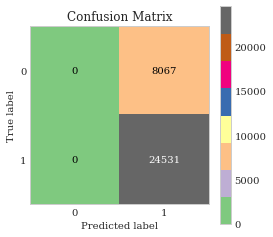

In [168]:
skplt.metrics.plot_confusion_matrix(y_train, y_train_pred, figsize=(4,4), cmap="Accent")

In [169]:
#Testing performance
y_valid_pred = reports_nb.predict(X_valid)
classificationSummary(y_valid, y_valid_pred, class_names=classes)

Confusion Matrix (Accuracy 0.7457)

       Prediction
Actual short  long
 short     0   921
  long     0  2701


#### Cutoff probability approach

In [170]:
# predicting probabilities
predProb_train = reports_nb.predict_proba(X_train)
predProb_valid = reports_nb.predict_proba(X_valid)

In [171]:
nb_result_tr = pd.DataFrame({'actual': y_train, 
                             'p(0)': [p[0] for p in predProb_train],
                             'p(1)': [p[1] for p in predProb_train],
                             'predicted': y_train_pred})
nb_result_tr.head()

,actual,p(0),p(1),predicted
26100,0,0.238096,0.761904,1
31920,1,0.238096,0.761904,1
22338,1,0.278802,0.721198,1
5279,0,0.212809,0.787191,1
32718,1,0.212809,0.787191,1


(array([ 9718.,     0.,     0.,     0.,  6003.,     0., 10348.,     0.,
            0.,  6529.]),
 array([0.72119784, 0.72779711, 0.73439638, 0.74099566, 0.74759493,
        0.75419421, 0.76079348, 0.76739275, 0.77399203, 0.7805913 ,
        0.78719058]),
 <a list of 10 Patch objects>)

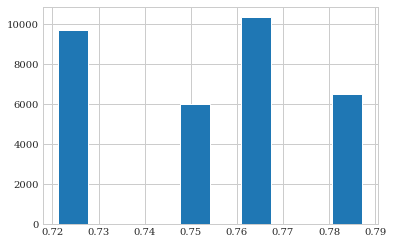

In [172]:
plt.hist(predProb_train[:,1])

In [173]:
# if we cut the probability values at 75%:
ypredclass_tr2 = np.where(predProb_train[:,1] > 0.75, 1, 0)

In [174]:
#Training performance with new cutoff
classificationSummary(y_train, ypredclass_tr2, class_names=classes)

Confusion Matrix (Accuracy 0.5287)

       Prediction
Actual short  long
 short  4213  3854
  long 11508 13023


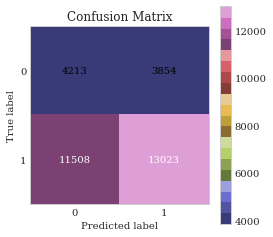

In [175]:
skplt.metrics.plot_confusion_matrix(y_train, ypredclass_tr2, figsize=(4,4), cmap="tab20b")

#### ROC curve

Area under the curve (AUC):
 0.5


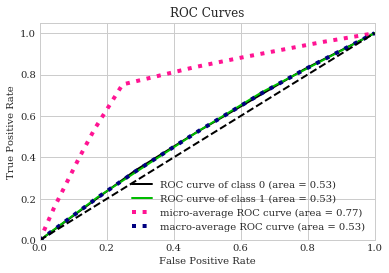

In [176]:
skplt.metrics.plot_roc(y_train, predProb_train)
print("Area under the curve (AUC):\n", roc_auc_score(y_train, y_train_pred))

#### Gains and Lift Charts

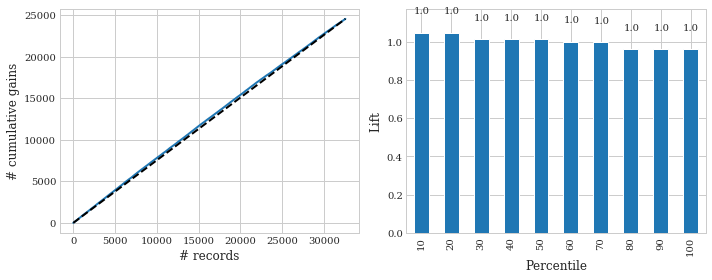

In [178]:
dfgains = nb_result_tr.sort_values(by='p(1)', ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(dfgains.actual, ax=axes[0])
liftChart(dfgains['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

#### Variants of the algorithm
* The available alogorithms for Naive Bayes in Scikit can [be found here](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [179]:
reports_cnb = ComplementNB()
reports_cnb.fit(X_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [180]:
#Training performance
y_train_pred_cnb = reports_cnb.predict(X_train)
classificationSummary(y_train, y_train_pred_cnb, class_names=classes)

Confusion Matrix (Accuracy 0.5287)

       Prediction
Actual short  long
 short  4213  3854
  long 11508 13023


<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

<a id='section_id5'></a>
### <span style="background-color:#B0E0E6"> Using all variables according to Flight Delays Example</span>
* Example from Chapter 8 of the [DMBA book](https://pitt.summon.serialssolutions.com/#!/search?bookMark=ePnHCXMw42JgAfZbU5khpymBDxSztADNrHEZgbYtA2tc0K0CXMBq3gRYkwA7SJwMSi6JJYkKueALERSATTUF6P2LxQqJoIM5QMcV8zCwpgGjI5WXgaWkqBRYcEq7uYY4e-iCDkeKhw50xAPTkpmJBejiIfyyKlhkYXM9QGVA95qYGQMA-383uA)

In [208]:
df1 = pd.read_csv('sleeping.csv')

In [209]:
df1.head()

,sleeping,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer
0,1,2,4,4,4,3,2,3,3
1,1,2,3,1,1,2,1,1,2
2,1,2,4,1,1,1,1,1,1
3,3,2,4,1,1,3,5,5,4
4,3,2,4,1,6,2,6,5,7


In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36220 entries, 0 to 36219
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sleeping    36220 non-null  int64
 1   sex         36220 non-null  int64
 2   race        36220 non-null  int64
 3   sexharass   36220 non-null  int64
 4   smoking     36220 non-null  int64
 5   vegetables  36220 non-null  int64
 6   soda        36220 non-null  int64
 7   breakfast   36220 non-null  int64
 8   computer    36220 non-null  int64
dtypes: int64(9)
memory usage: 2.5 MB


In [211]:
# inserting a health_category column
df1['sleepcat']=pd.cut(df1['sleeping'], bins=[0,4,8], labels=['short', 'long']) # 0 = short, 1 =long
df1.head(3)

,sleeping,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer,sleepcat
0,1,2,4,4,4,3,2,3,3,short
1,1,2,3,1,1,2,1,1,2,short
2,1,2,4,1,1,1,1,1,1,short


In [212]:
df1.drop(columns=['sleeping'], inplace=True) # no need to do this

In [213]:
df1.columns

Index(['sex', 'race', 'sexharass', 'smoking', 'vegetables', 'soda',
       'breakfast', 'computer', 'sleepcat'],
      dtype='object')

#### Begin with our usual first step: exploratory analysis

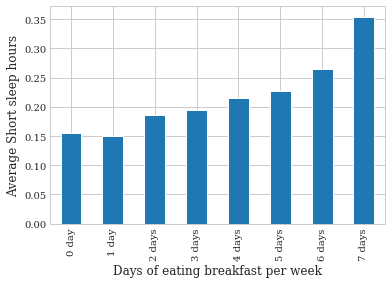

In [214]:
#Exploring average sleeping hours by days of eating breakfast a week
short_df1=df1
# Create an indicator variable
short_df1['isLong'] = [1 if status == 'long' else 0 for status in short_df1['sleepcat']]

# group information by day of week and determine the average delay
averageShort = short_df1.groupby(['breakfast'])['isLong'].mean()

# create a bar chart
ax = averageShort.plot.bar(color='C0')
ax.set_xlabel('Days of eating breakfast per week')
ax.set_ylabel('Average Short sleep hours')
_ = ax.set_xticklabels(['0 day', '1 day', '2 days', '3 days', '4 days', '5 days', '6 days', '7 days'])

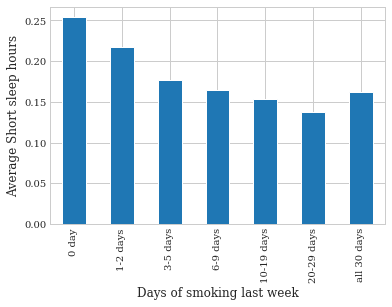

In [215]:
#Exploring average sleeping hours by days of eating breakfast a week
short_df1=df1
# Create an indicator variable
short_df1['isLong'] = [1 if status == 'long' else 0 for status in short_df1['sleepcat']]

# group information by day of week and determine the average delay
averageShort = short_df1.groupby(['smoking'])['isLong'].mean()

# create a bar chart
ax = averageShort.plot.bar(color='C0')
ax.set_xlabel('Days of smoking last week')
ax.set_ylabel('Average Short sleep hours')
_ = ax.set_xticklabels(['0 day', '1-2 days', '3-5 days', '6-9 days', '10-19 days', '20-29 days', 'all 30 days'])

In [216]:
#Functions to draw more graphs and adding tweaks
def createGraph(group, xlabel, axis):
    groupAverage = short_df1.groupby([group])['isLong'].mean()
    
    ax = groupAverage.plot.bar(color='C0', ax=axis)
    ax.set_ylabel('Average sleeping hours')
    ax.set_xlabel(xlabel)
    return ax


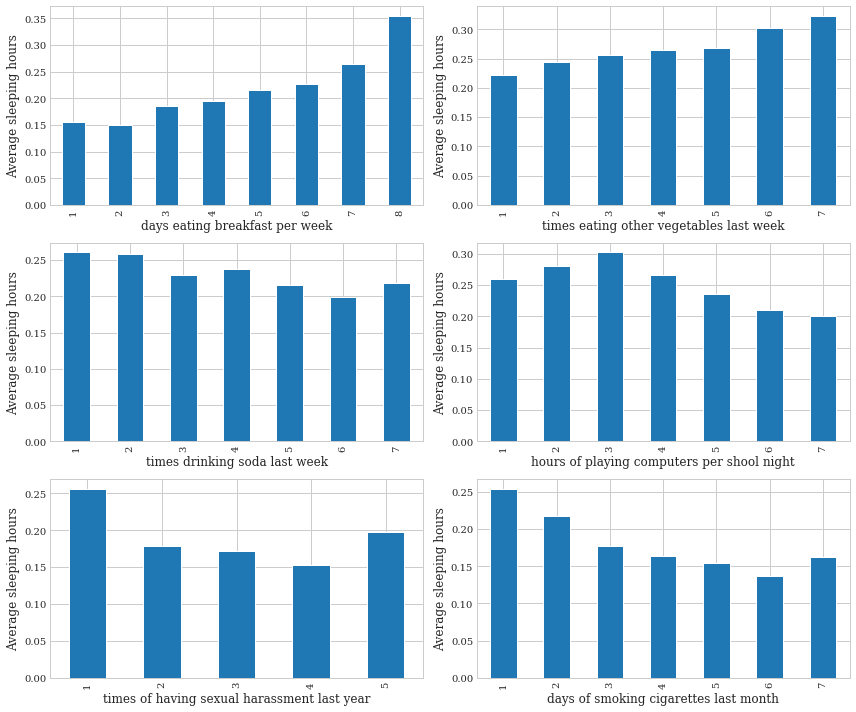

In [217]:
#plot the graphs using the above functions:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
createGraph('breakfast', 'days eating breakfast per week', axis=axes[0][0])
createGraph('vegetables', 'times eating other vegetables last week', axis=axes[0][1])
createGraph('soda', 'times drinking soda last week', axis=axes[1][0])
createGraph('computer', 'hours of playing computers per shool night', axis=axes[1][1])
createGraph('sexharass', 'times of having sexual harassment last year', axis=axes[2][0])
createGraph('smoking', 'days of smoking cigarettes last month', axis=axes[2][1])
plt.tight_layout()

plt.show()

* On average, the more vegetables or breakfast students eat per week, the longer they sleep per school night.
* On average, students who haven't being sexually harrassed sleep more than those had such experience.
* On average, the more frequently students smoking cigarettes or drinking soda, the shorter they sleep per school night. 

<div style="text-align: right"> <a href='#section_id0'>Back to top of Notebook</a></div>

#### Next, organize the data for Naive Bayes

In [218]:
short_df1.head(3)

,sex,race,sexharass,smoking,vegetables,soda,breakfast,computer,sleepcat,isLong
0,2,4,4,4,3,2,3,3,short,0
1,2,3,1,1,2,1,1,2,short,0
2,2,4,1,1,1,1,1,1,short,0


In [219]:
# convert to categorical
short_df1.sex = short_df1.sex.astype('category')
short_df1.race = short_df1.race.astype('category')
short_df1.sexharass = short_df1.sexharass.astype('category')
short_df1.smoking = short_df1.smoking.astype('category')
short_df1.vegetables = short_df1.vegetables.astype('category')
short_df1.soda = short_df1.soda.astype('category')
short_df1.breakfast = short_df1.breakfast.astype('category')
short_df1.computer = short_df1.computer.astype('category')



In [230]:
predictors = ['sex', 'race', 'sexharass', 'smoking', 'vegetables', 'soda', 'breakfast', 'computer']
outcome = 'sleepcat'
X = pd.get_dummies(short_df1[predictors])
y = (short_df1[outcome] == 'long').astype(int)
classes = ['long', 'short']

#### Train the model

In [231]:
# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

In [232]:
# run naive Bayes
satisf_nb = MultinomialNB(alpha=0.01)
satisf_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [233]:
# run naive Bayes
satisf_nb = MultinomialNB(alpha=0.01)
satisf_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [234]:
# Training Performance 
predProb_train = satisf_nb.predict_proba(X_train)
y_train_pred = satisf_nb.predict(X_train)
classificationSummary(y_train, y_train_pred, class_names=classes) 

Confusion Matrix (Accuracy 0.7530)

       Prediction
Actual  long short
  long 16254   136
 short  5232   110


#### Peformance of the model in the test dataset

In [235]:
#Testing performance:
predProb_valid = satisf_nb.predict_proba(X_valid)
y_valid_pred = satisf_nb.predict(X_valid)
classificationSummary(y_valid, y_valid_pred, class_names=classes)

Confusion Matrix (Accuracy 0.7475)

       Prediction
Actual  long short
  long 10759    83
 short  3575    71


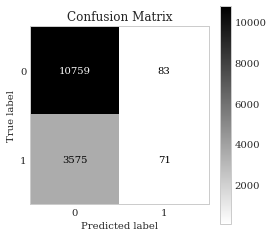

In [236]:
skplt.metrics.plot_confusion_matrix(y_valid, y_valid_pred, figsize=(4,4), cmap="gist_yarg")

<Mark>Interpretation:</Mark> We see that the model resulted in 75% accuracy of classifying sleeping duration. 71 out of the 3646 students with sufficient sleep were correctly identified by the model. It missed 3575 others who had sufficient sleep, and wrongly identifed 83 as having sufficient sleep.<br>

Area under the curve (AUC):
 0.5059089906858428


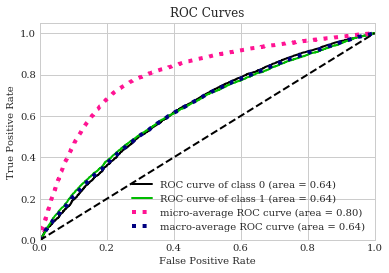

In [237]:
skplt.metrics.plot_roc(y_valid, predProb_valid)
print("Area under the curve (AUC):\n", roc_auc_score(y_valid, y_valid_pred))

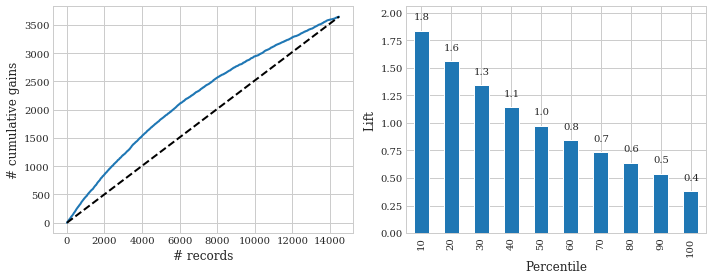

In [238]:
nb_delay_tt = pd.DataFrame({'actual': y_valid, 
                             'p(0)': [p[0] for p in predProb_valid],
                             'p(1)': [p[1] for p in predProb_valid],
                             'predicted': y_valid_pred})
nb_delay_tt.head()


dfgains1 = nb_delay_tt.sort_values(by='p(1)', ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(dfgains1.actual, ax=axes[0])
liftChart(dfgains1['p(1)'], title=False, ax=axes[1])
    
plt.tight_layout()
plt.show()

<a id='section_id6'></a>
### <span style="background-color:#B0E0E6">References:</span>

* Chapter 8 of _Datamining for Business Analytics_. [Access through Pitt library](https://pitt.summon.serialssolutions.com/#!/search?bookMark=ePnHCXMw42JgAfZbU5khpymBDxSztADNrHEZgbYtA2tc0K0CXMBq3gRYkwA7SJwMSi6JJYkKueALERSATTUF6P2LxQqJoIM5QMcV8zCwpgGjI5WXgaWkqBRYcEq7uYY4e-iCDkeKhw50xAPTkpmJBejiIfyyKlhkYXM9QGVA95qYGQMA-383uA)
* An intuitive cartoon-based [introduction to Bayesian Statistics](https://faculty.washington.edu/kenrice/BayesIntroClassEpi2018.pdf) by Professor Rice
* Third edition of [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/BDA3.pdf) by Gelman, Carlin, Dunson, and Rubin

***
<font color="#610B21"><center>\~\~ End of Part-5. We'll discuss decision tree approaches in Part-6\~\~ </center>
<font color="#0B610B"><center>*** See you later! *** </center>
***